In [23]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from ipywidgets import Layout, Button, Box
from nested_dict import nested_dict
import ipywidgets as widgets

import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns

sns.set(style="whitegrid")

In [24]:
artifacts_dir = "/home/sk/sandmark/notebooks/nightly/sandmark-nightly/"

In [25]:
bench_files = []

artifacts_path = artifacts_dir.split("/sandmark-nightly/sequential")[0]
# print(artifacts_path)

for root, dirs, files in os.walk(artifacts_dir):
#     print(dirs)
    for file in files:
#         print(file)
        if file.endswith("_1.orun.summary.bench"):
            # print(root)
            f = root.split("/sequential/")
#             print(f)
            bench_files.append((os.path.join(root, file)))

print(bench_files[0])

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210531_060002/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+stock_1.orun.summary.bench


In [26]:
# len(bench_files)
for b in bench_files :
    print(b + '\n')

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210531_060002/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+stock_1.orun.summary.bench

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210527_084314/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+domains+effects_1.orun.summary.bench

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210527_084314/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+stock_1.orun.summary.bench

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210526_000013/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+domains+effects_1.orun.summary.bench

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210526_000013/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+stock_1.orun.summary.bench

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210528_174921/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+domains+effects_1.orun.summary.bench

/home/sk/sandmark/notebooks/nightl

In [27]:
benches = nested_dict(2, list)
for x in bench_files:
    l = x.split("/sequential/")[1]
#     print(l)
    d = l.split("/")
#     print(d)
    timestamp  = d[0]
    commit     = d[1]
    variant    = d[2]
    value      = timestamp + " " + commit + " " + variant
    benches[timestamp][commit].append(value)
benches = benches.to_dict()

In [28]:
benches

{'20210531_060002': {'80580f1d913a70fd3cb4847f828ce6a7d284a05c': ['20210531_060002 80580f1d913a70fd3cb4847f828ce6a7d284a05c 4.12.0+stock_1.orun.summary.bench']},
 '20210527_084314': {'80580f1d913a70fd3cb4847f828ce6a7d284a05c': ['20210527_084314 80580f1d913a70fd3cb4847f828ce6a7d284a05c 4.12.0+domains+effects_1.orun.summary.bench',
   '20210527_084314 80580f1d913a70fd3cb4847f828ce6a7d284a05c 4.12.0+stock_1.orun.summary.bench']},
 '20210526_000013': {'80580f1d913a70fd3cb4847f828ce6a7d284a05c': ['20210526_000013 80580f1d913a70fd3cb4847f828ce6a7d284a05c 4.12.0+domains+effects_1.orun.summary.bench',
   '20210526_000013 80580f1d913a70fd3cb4847f828ce6a7d284a05c 4.12.0+stock_1.orun.summary.bench']},
 '20210528_174921': {'80580f1d913a70fd3cb4847f828ce6a7d284a05c': ['20210528_174921 80580f1d913a70fd3cb4847f828ce6a7d284a05c 4.12.0+domains+effects_1.orun.summary.bench',
   '20210528_174921 80580f1d913a70fd3cb4847f828ce6a7d284a05c 4.12.0+stock_1.orun.summary.bench']},
 '20210525_164023': {'80580f1d9

In [29]:
def f(x): return x

def disp(benches):    
    def select_commit(timestamp):
        commitW.options = benches[timestamp]

    def select_variant(commit):
        variantW.options = commit
    
    def stub(variant):
        return None
    
    timestampW = widgets.Dropdown(options=benches.keys(), description='Timestamp', disabled=False)
    timestampS = timestampW.value
    timestampD = widgets.interactive(select_commit, timestamp=timestampW)
    
    commitW = widgets.Dropdown(options=benches[timestampS].keys(), description='Commit', disabled=False)
    commitS = commitW.value
    commitD = widgets.interactive(select_variant, commit=commitW)
    
#     variant_options = [x.split(' ')[2] for x in benches[timestampS][commitS]]
    variantW = widgets.Dropdown(options=benches[timestampS][commitS], description='Variant', disabled=False)
    variantS = variantW.value
    variantD = widgets.interactive(stub, variant=variantW)

    items_layout = Layout( width='auto' )
    
    box_layout = Layout(display='flex',
                       flex_flow='row wrap',
                       align_items='flex-start',
                       #border='solid',
                       width='100%')
    
    items = [timestampD, commitD, variantD]
    box = Box(children=items, layout=box_layout)
#     print(box)
    display(box)
    return (timestampD, commitD, variantD)

def get_filename(timestamp, variant):
    timestamp = timestamp.children[0].value
    commit_id = variant.children[0].value.split(' ')[1]
    variant   = variant.children[0].value.split(' ')[2] 
    filename = os.path.join(
        artifacts_path, 
        "sequential", 
        timestamp,
        commit_id,
        variant
        )
    print(filename)
    return filename

In [30]:
comparisons = interactive(f, x=widgets.IntText(value=2, 
                                               description='Comparisons', 
                                               disabled=False))
display(comparisons)

interactive(children=(IntText(value=2, description='Comparisons'), Output()), _dom_classes=('widget-interact',…

In [31]:
print(comparisons.result)

2


In [32]:
matrix = [[0 for x in range(4)] for y in range(comparisons.result)]  
    
for i in range(comparisons.result):
    matrix[i][0], matrix[i][1], matrix[i][2] = disp(benches)

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210531_060002', '20210527_08…

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210531_060002', '20210527_08…

In [33]:
for i in range(comparisons.result):
    matrix[i][3] = get_filename(matrix[i][0], matrix[i][2])

# print(matrix[0][2])
# print(matrix[1][2])

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210531_060002/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+stock_1.orun.summary.bench
/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210531_060002/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+stock_1.orun.summary.bench


In [34]:
selected_files = []
for i in range (comparisons.result):
    print(matrix[i][3])
    selected_files.append(matrix[i][3])

# print(selected_files)

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210531_060002/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+stock_1.orun.summary.bench
/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210531_060002/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+stock_1.orun.summary.bench


In [35]:
data_frames = []

for file in selected_files:
    print(file)
    with open(file) as f:
        data = []
        for l in f:
            data.append(json.loads(l))
        df = pdjson.json_normalize(data)
        df["variant"] = os.path.basename(file).replace("_1.orun.summary.bench","")
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name']) 
# Uncomment the following to display all the lines in pandas output
pd.set_option('display.max_rows', df.shape[0]+1)
df

/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210531_060002/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+stock_1.orun.summary.bench
/home/sk/sandmark/notebooks/nightly/sandmark-nightly/sequential/20210531_060002/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+stock_1.orun.summary.bench


<ipython-input-35-5937bbf1f8ed>:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = pdjson.json_normalize(data)


,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,gc.forced_major_collections,variant
11,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.016282,4.008008,0.008000,29668,53408.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,165,4194473,8218,4,5790208,4,5790208,0,1,4.12.0+stock
11,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.016282,4.008008,0.008000,29668,53408.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,165,4194473,8218,4,5790208,4,5790208,0,1,4.12.0+stock
24,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.171895,1.962084,0.209576,352384,2381362.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,43579828,45742623,698,13,49342464,37,49342464,0,0,4.12.0+stock
24,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.171895,1.962084,0.209576,352384,2381362.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,43579828,45742623,698,13,49342464,37,49342464,0,0,4.12.0+stock
13,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,17.440519,17.272125,0.168001,282200,2381362.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,54349677,60519236,7885,21,37309440,35,37309440,0,0,4.12.0+stock
13,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,17.440519,17.272125,0.168001,282200,2381362.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,54349677,60519236,7885,21,37309440,35,37309440,0,0,4.12.0+stock
36,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.319940,5.303653,0.015998,21264,139047.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,1931250,2463352,4689,9,2264576,15,2264576,0,0,4.12.0+stock
36,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.319940,5.303653,0.015998,21264,139047.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,1931250,2463352,4689,9,2264576,15,2264576,0,0,4.12.0+stock
43,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,12.637595,12.537302,0.100010,154776,231416.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,270973795,270973795,3527,63,18974208,33,18974208,0,1,4.12.0+stock
43,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,12.637595,12.537302,0.100010,154776,231416.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,270973795,270973795,3527,63,18974208,33,18974208,0,1,4.12.0+stock


In [369]:
df = df[(df.name != 'alt-ergo.fill.why') &         #multicore version does not exist
        (df.name != 'alt-ergo.yyll.why') &         #multicore version does not exist
        (df.name != 'frama-c.slevel') &            #multicore version does not exist
        (df.name != 'js_of_ocaml.frama-c_byte')]   #multicore version does not exist
throughput_df = df
df

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,gc.heap_chunks,gc.compactions
11,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.121436,3.991880,0.019999,29592,53408.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,4194473,8218,4,1,5790208,5790208,NaN,4.12.0+stock,4.0,0.0
11,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.267397,4.162994,0.027993,37932,68784.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,4194792,8217,2,0,4231434,4231434,3.492858,4.12.0+domains+effects,NaN,NaN
36,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.396639,5.392296,0.004000,22208,164078.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,2484415,4695,10,0,2023316,2088855,24.370582,4.12.0+domains+effects,NaN,NaN
36,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.264311,5.259944,0.003999,21240,139047.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,2463352,4689,9,0,2264576,2264576,NaN,4.12.0+stock,15.0,0.0
43,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,12.679688,12.595280,0.083995,154752,231416.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,270973795,3527,63,1,18974208,18974208,NaN,4.12.0+stock,33.0,0.0
43,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,11.795573,11.723167,0.072019,146796,282776.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,280594544,3565,69,0,15786238,18084094,38.706226,4.12.0+domains+effects,NaN,NaN
35,chameneos_redux_lwt.600000,taskset --cpu-list 5 ./chameneos_redux_lwt.exe...,4.290100,1.891042,2.398784,6384,334745.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,789418,2187,201,1,61440,188416,NaN,4.12.0+stock,1.0,2.0
35,chameneos_redux_lwt.600000,taskset --cpu-list 5 ./chameneos_redux_lwt.exe...,4.419277,2.039520,2.379440,6920,417561.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,748301,2144,57,0,102654,102654,389.769162,4.12.0+domains+effects,NaN,NaN
49,coq.AbstractInterpretation.v,taskset --cpu-list 5 coqc benchmarks/coq/Abstr...,324.771059,323.344963,1.423986,1180836,5910872.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,975009400,271639,79,0,68303298,118410396,44.505921,4.12.0+domains+effects,NaN,NaN
49,coq.AbstractInterpretation.v,taskset --cpu-list 5 coqc benchmarks/coq/Abstr...,299.327091,298.271287,1.051983,679124,4964253.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,659902703,272701,69,4,80033280,80033280,NaN,4.12.0+stock,39.0,0.0


In [21]:
baseline_t, baseline_c, baseline_v = disp(benches)

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210531_060002', '20210527_08…

In [37]:
selected_baseline = ""
selected_baseline = baseline_v.children[0].value.split(" ")[2].split("_1.orun.summary.bench")[0]

print(selected_baseline)

4.12.0+stock


In [380]:
df.loc[(df['variant'] == selected_baseline) & (df['time_secs'] > 10)]

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,gc.heap_chunks,gc.compactions,display_name
43,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,11.795573,11.723167,0.072019,146796,282776.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,3565,69,0,15786238,18084094,38.706226,4.12.0+domains+effects,NaN,NaN,binarytrees5.21 (12.68)
49,coq.AbstractInterpretation.v,taskset --cpu-list 5 coqc benchmarks/coq/Abstr...,324.771059,323.344963,1.423986,1180836,5910872.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,271639,79,0,68303298,118410396,44.505921,4.12.0+domains+effects,NaN,NaN,coq.AbstractInterpretation.v (299.33)
7,coq.BasicSyntax.v,taskset --cpu-list 5 coqc benchmarks/coq/Basic...,112.605467,111.868064,0.735974,667588,5910872.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,90113,42,0,53844519,56245404,37.569623,4.12.0+domains+effects,NaN,NaN,coq.BasicSyntax.v (106.63)
39,cpdf.scale,taskset --cpu-list 5 cpdf scale-to-fit a4lands...,14.158228,13.838443,0.231973,288076,1139519.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,2286,28,0,33343919,34731704,27.234306,4.12.0+domains+effects,NaN,NaN,cpdf.scale (14.26)
45,cpdf.squeeze,taskset --cpu-list 5 cpdf -squeeze benchmarks/...,16.426896,16.070453,0.356054,372124,1139519.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,1655,32,0,29010811,45884648,28.547347,4.12.0+domains+effects,NaN,NaN,cpdf.squeeze (16.63)
44,cubicle.german_pfs.cub,taskset --cpu-list 5 cubicle benchmarks/cubicl...,267.067646,264.909295,1.527994,418432,1231574.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,77223,460,0,34062938,57345335,112.102783,4.12.0+domains+effects,NaN,NaN,cubicle.german_pfs.cub (237.76)
27,cubicle.szymanski_at.cub,taskset --cpu-list 5 cubicle benchmarks/cubicl...,502.365748,501.781513,0.579995,175112,1231574.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,406198,1468,0,16925578,27312585,86.638085,4.12.0+domains+effects,NaN,NaN,cubicle.szymanski_at.cub (511.08)
16,evolutionary_algorithm.10000_10000,taskset --cpu-list 5 ./evolutionary_algorithm....,75.162324,70.200225,4.356013,3290508,169604.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,14255,29,0,400370110,420466137,13.392553,4.12.0+domains+effects,NaN,NaN,evolutionary_algorithm.10000_10000 (81.58)
32,fannkuchredux.12,taskset --cpu-list 5 ./fannkuchredux.exe 12,99.497025,98.000261,0.003999,5088,282878.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,0,0,0,4350,4350,0.000000,4.12.0+domains+effects,NaN,NaN,fannkuchredux.12 (98.72)
31,fannkuchredux2.12,taskset --cpu-list 5 ./fannkuchredux2.exe 12,94.487423,94.321093,0.000000,5240,283142.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,0,0,0,4350,4350,0.000000,4.12.0+domains+effects,NaN,NaN,fannkuchredux2.12 (87.7)


In [381]:
df.filter(['name','variant','time_secs'])
# print(len(df))

,name,variant,time_secs
11,LU_decomposition.1024,4.12.0+stock,4.121436
11,LU_decomposition.1024,4.12.0+domains+effects,4.267397
36,bdd.26,4.12.0+domains+effects,5.396639
36,bdd.26,4.12.0+stock,5.264311
43,binarytrees5.21,4.12.0+stock,12.679688
43,binarytrees5.21,4.12.0+domains+effects,11.795573
35,chameneos_redux_lwt.600000,4.12.0+stock,4.290100
35,chameneos_redux_lwt.600000,4.12.0+domains+effects,4.419277
49,coq.AbstractInterpretation.v,4.12.0+domains+effects,324.771059
49,coq.AbstractInterpretation.v,4.12.0+stock,299.327091


## Time

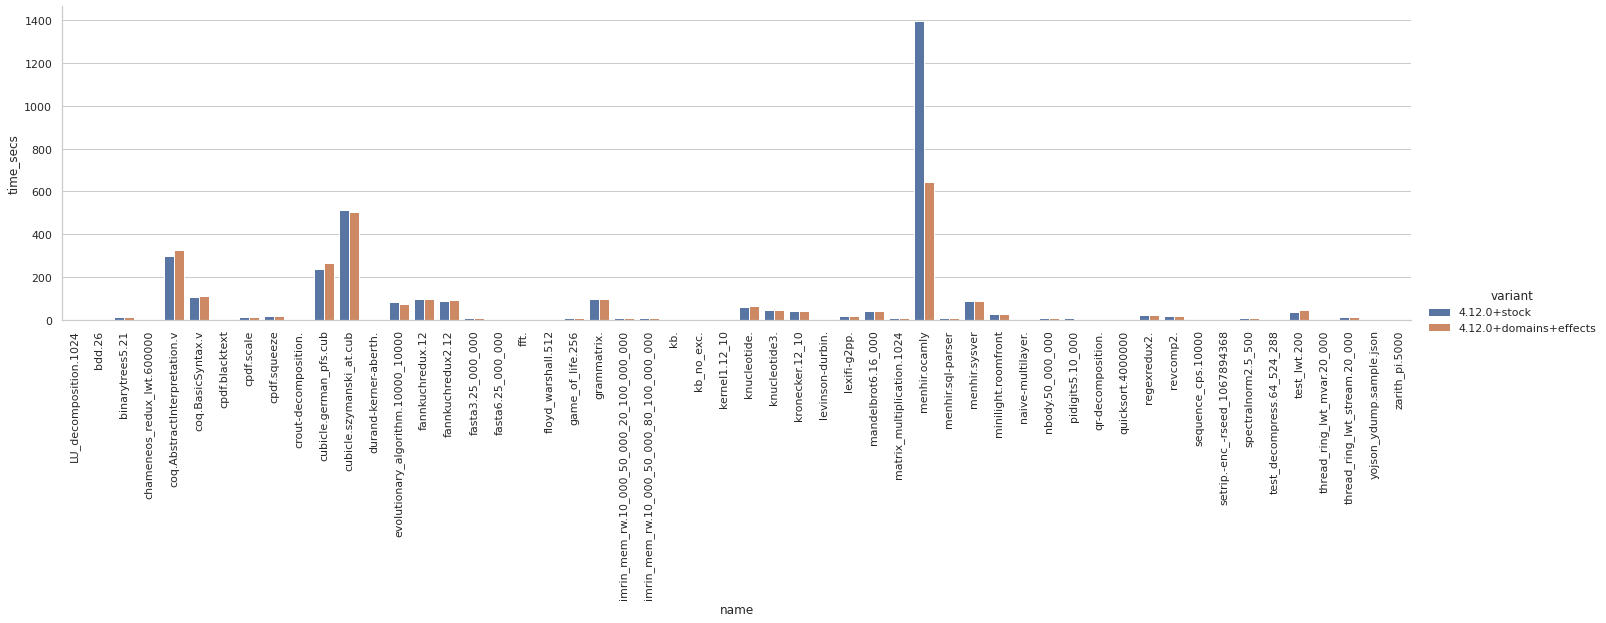

In [382]:
g = sns.catplot (x='name', y='time_secs', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalized

In [385]:
# returns a dictionary with {key = name : value : metric}
# the metric corresponds to the variant
def create_column(df, variant, metric):
    df = pd.DataFrame.copy(df)
#     print(df['variant'])
    variant_metric_name = list([ zip(df[metric], df[x], df['name'])
            for x in df.columns.array if x == "variant" ][0])
    name_metric = {n:t for (t, v, n) in variant_metric_name if v == variant}
#     print(name_metric)
    return name_metric

def add_display_name(df,variant, metric):
    name_metric = create_column(pd.DataFrame.copy(df), variant, metric)
#     print(name_metric)
    disp_name = [name+" ("+str(round(name_metric[name], 2))+")" for name in df["name"]]
    df["display_name"] = pd.Series(disp_name, index=df.index)
#     print(df)
    return df

def normalise(df,variant,topic,additionalTopics=[]):
    df = add_display_name(df,variant,topic)
    df = df.sort_values(["name","variant"])
#     print(df)
    grouped = df.filter(items=['name',topic,'variant','display_name']+additionalTopics).groupby('variant')
    ndata_frames = []
    for group in grouped:
#         print(group)
        (v,data) = group
#         print(len(data[topic]))
        if(v != variant):
            data['b'+topic] = grouped.get_group(variant)[topic].values
            data[['n'+topic]] = data[[topic]].div(grouped.get_group(variant)[topic].values, axis=0)
            for t in additionalTopics:
#                 print(variant, t)
                data[[t]] = grouped.get_group(variant)[t].values
            ndata_frames.append(data)
    df = pd.concat (ndata_frames)
    return df

def plot_normalised(df,variant,topic):
    df = pd.DataFrame.copy(df)
    df.sort_values(by=[topic],inplace=True)
    df[topic] = df[topic] - 1
    g = sns.catplot (x="display_name", y=topic, hue='variant', data = df, kind ='bar', aspect=4, bottom=1)
    g.set_xticklabels(rotation=90)
    g.ax.legend(loc=8)
    g._legend.remove()
    g.ax.set_xlabel("Benchmarks")
    return g
    # g.ax.set_yscale('log')

<ipython-input-385-08f58ced0db8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


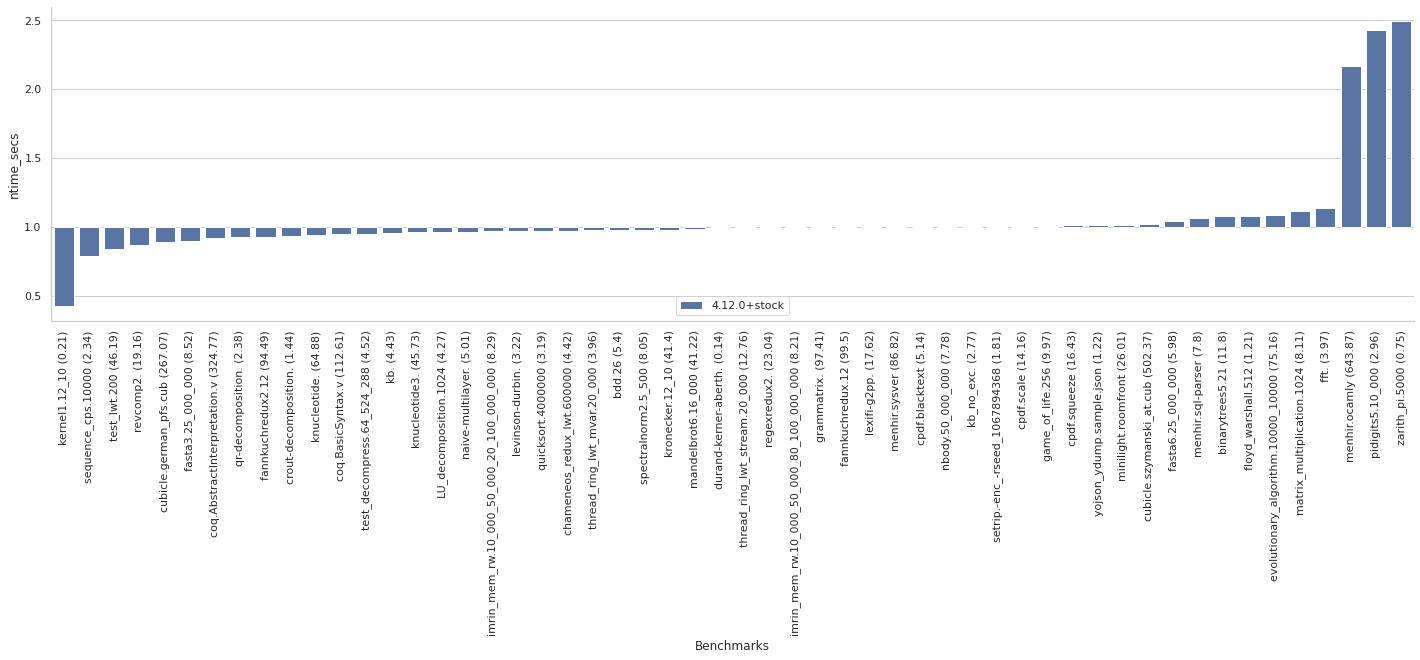

In [386]:
# print(df)
ndf = normalise(df, selected_baseline,'time_secs')
plot_normalised(ndf, selected_baseline,'ntime_secs')